# **Cats_Vs_Dogs Convolution Neural Network**

Problem Statement: 

The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). 

We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.

Objectives:

Data Preparation:

● Download and extract the cats vs. dogs dataset.

● Organize the dataset into a structured directory format suitable for
TensorFlow’s ImageDataGenerator.

● Split the dataset into training and testing sets.

Data Augmentation and Preprocessing: 

● Implement data augmentation techniques to increase the diversity of the
training dataset, aiding in the model's ability to generalize.

● Normalize the pixel values of the images for optimal model performance.
Model Building:

● Construct a Convolutional Neural Network using TensorFlow and Keras.

● The model should contain multiple convolutional layers, pooling layers, and
fully connected layers.

Training:

● Compile the model and train it on the prepared dataset.

● Utilize categorical cross entropy as the loss function and stochastic
gradient descent as the optimizer.

● Train the model for a sufficient number of epochs to achieve good
performance.

Evaluation:

● Evaluate the model's performance on the validation set during training to
monitor for overfitting.

● After training, assess the model's accuracy and make predictions on the
test set.

Prediction:

● Implement a system to make predictions on new images, categorizing
them as either cat or dog

The system should be able to take an image (or a batch of images),
preprocess it, and pass it through the model for predictions.

# Importing Libraries and Packages

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

# Loading Files in Zip

In [2]:
from zipfile import ZipFile

data_path = 'cats-vs-dogs-classified.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [3]:
path = 'cats-vs-dogs'
classes = os.listdir(path)
classes

['test', 'train']

# Removing Corrupt Images

In [4]:
import os
import tensorflow as tf

num_skipped = 0
folder_path = "cats-vs-dogs" # replace with your actual folder path

for root, dirs, files in os.walk(folder_path):
    for fname in files:
        fpath = os.path.join(root, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1578 images


# Visualization of train_directory

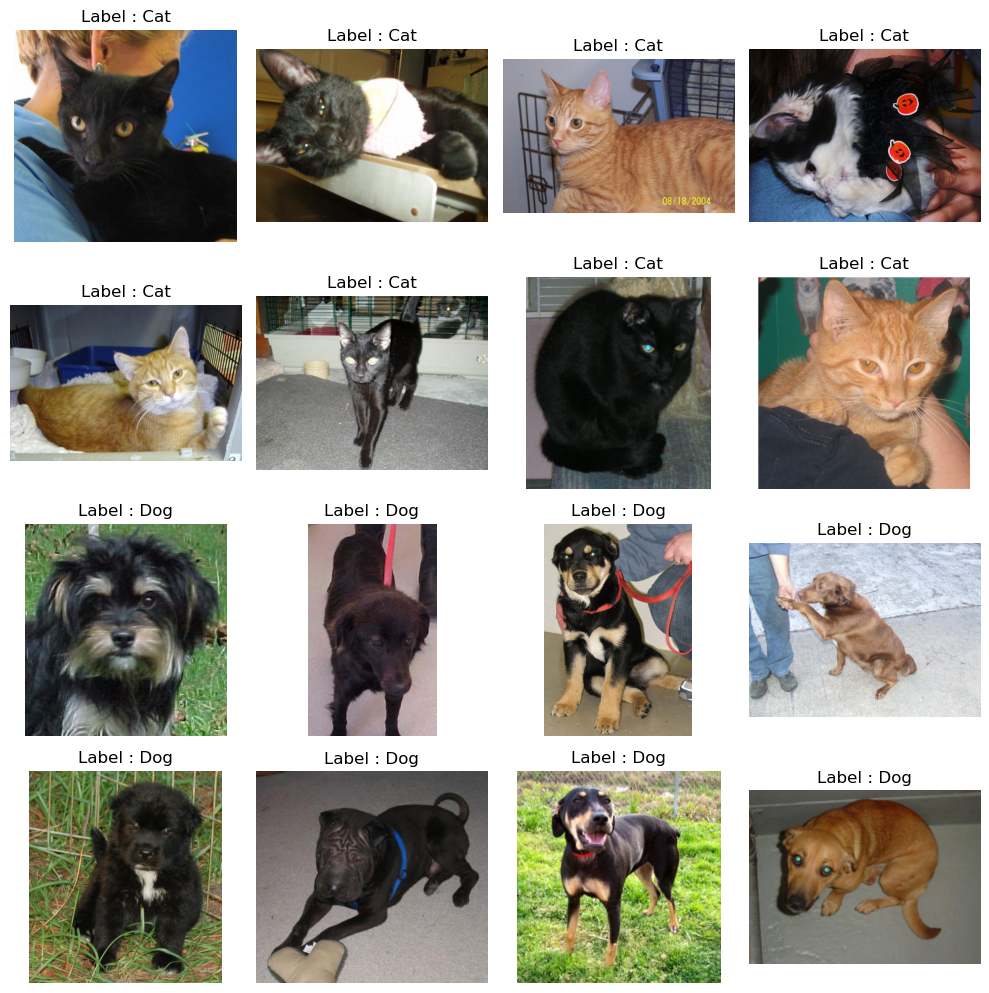

In [5]:
fig = plt.gcf()
fig.set_size_inches(10,10)

cat_dir = os.path.join('cats-vs-dogs/train/Cat')
dog_dir = os.path.join('cats-vs-dogs/train/Dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210
cat_images = [os.path.join(cat_dir,fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir,fname) for fname in dog_names[pic_index-8:pic_index]]

for i,img_path in enumerate(cat_images + dog_images):
     sp = plt.subplot(4,4,i+1)
     sp.axis('off')
     img = mpimg.imread(img_path)
     plt.imshow(img)
     plt.title(f"Label : {img_path[19:22]}")

plt.tight_layout()
plt.show()

# Visualization of test_directory

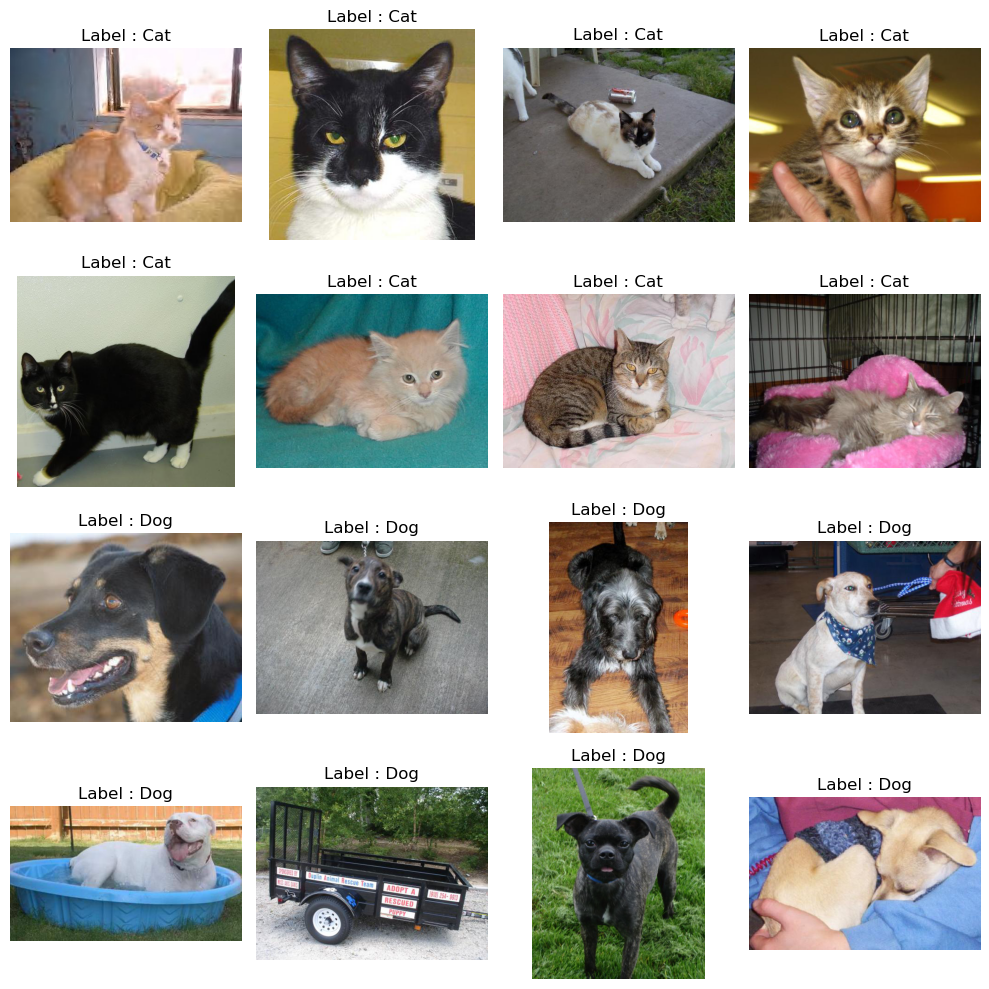

In [6]:
fig = plt.gcf()
fig.set_size_inches(10,10)

cat_dir = os.path.join('cats-vs-dogs/test/Cat')
dog_dir = os.path.join('cats-vs-dogs/test/Dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210
cat_images = [os.path.join(cat_dir,fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir,fname) for fname in dog_names[pic_index-8:pic_index]]

for i,img_path in enumerate(cat_images + dog_images):
     sp = plt.subplot(4,4,i+1)
     sp.axis('off')
     img = mpimg.imread(img_path)
     plt.imshow(img)
     plt.title(f"Label : {img_path[18:21]}")

plt.tight_layout()
plt.show()

# Normalization and Data Augmentation through ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

# Splitting the data into Training_set and Testing_set

In [8]:
# creating variables for directory of train and test
train_dir = 'cats-vs-dogs/train'
valid_dir = 'cats-vs-dogs/test'

training_set = train_datagen.flow_from_directory(directory=train_dir,
                                                    batch_size=32,              
                                                    target_size=(150,150),
                                                    class_mode='binary')


testing_set = test_datagen.flow_from_directory(directory=valid_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

Found 18738 images belonging to 2 classes.
Found 4684 images belonging to 2 classes.


# Model Building

In [9]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    
    # Flatten Layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    # Output Layer   
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation='sigmoid'))

# Compile of model

In [11]:
model.compile(
             loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

# Model Training

In [12]:
history = model.fit(training_set,
          epochs=5,
          validation_data=testing_set)

Epoch 1/5
586/586 ━━━━━━━━━━━━━━━━━━━━ 415s 703ms/step - accuracy: 0.6363 - loss: 0.7984 - val_accuracy: 0.6296 - val_loss: 0.6857
Epoch 2/5
586/586 ━━━━━━━━━━━━━━━━━━━━ 422s 720ms/step - accuracy: 0.7495 - loss: 0.5079 - val_accuracy: 0.7818 - val_loss: 0.5069
Epoch 3/5
586/586 ━━━━━━━━━━━━━━━━━━━━ 420s 717ms/step - accuracy: 0.7887 - loss: 0.4461 - val_accuracy: 0.7968 - val_loss: 0.4413
Epoch 4/5
586/586 ━━━━━━━━━━━━━━━━━━━━ 418s 713ms/step - accuracy: 0.8170 - loss: 0.3977 - val_accuracy: 0.8064 - val_loss: 0.4928
Epoch 5/5
586/586 ━━━━━━━━━━━━━━━━━━━━ 417s 711ms/step - accuracy: 0.8381 - loss: 0.3643 - val_accuracy: 0.7684 - val_loss: 0.8145


# Saving model 

In [20]:
model.save('cats_vs_dogs_cnn_model.h5')

# Evaluate

In [21]:
loss , accuracy = model.evaluate(testing_set)
print(f"Accuracy : {accuracy:.4f}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 162ms/step - accuracy: 0.8914 - loss: 0.3426
Accuracy : 0.7684


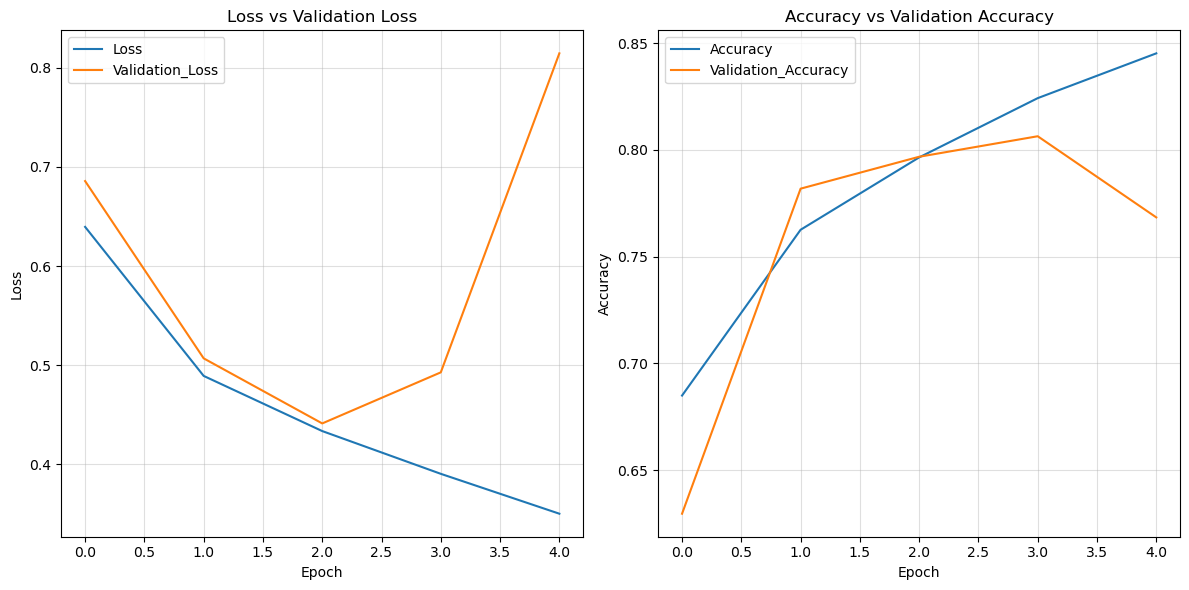

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Validation Loss") 
plt.legend()
plt.grid(alpha=0.40)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Validation Accuracy") 
plt.legend()
plt.grid(alpha=0.40)
plt.tight_layout()
plt.show()

# Testing 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Cat


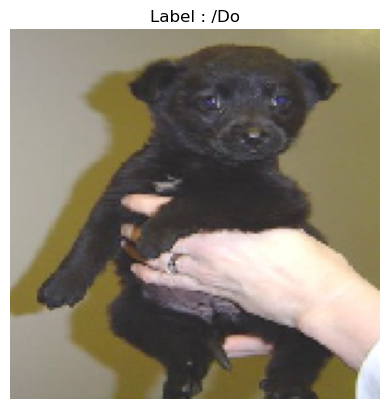

In [23]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f"Label : {image_path[len(image_path)-12:len(image_path)-9]}")
    plt.axis('off')
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('cats-vs-dogs/test/Dog/200.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Cat


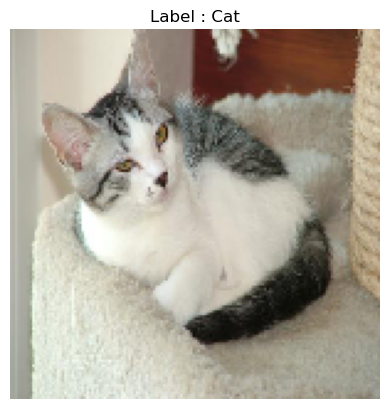

In [24]:
predict_image('cats-vs-dogs/train/Cat/5100.jpg')